![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)
# 【章節三】單元十二 分類模型實作 支援向量機
# 注意事項
* [[Kaggle Link](https://www.kaggle.com/lodetomasi1995/income-classification)] 需先下載 income_evaluation.csv 並上傳到此虛擬機(VM, Virtual Machine)上

## 步驟一: 讀取收入分類資料集

In [87]:
import pandas as pd # 常用來讀 csv 的套件

Dataset = pd.read_csv("./income_evaluation.csv")
Dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 步驟二:資料視覺化與特徵工程
* 處理缺失值
* 處理欄位空格字元
* 視覺化與特徵工程
* 將欄位(income)轉換成 1 與 0 的形式

In [88]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()} 筆")

第1個欄位 age 的缺失值共有 0 筆
第2個欄位  workclass 的缺失值共有 0 筆
第3個欄位  fnlwgt 的缺失值共有 0 筆
第4個欄位  education 的缺失值共有 0 筆
第5個欄位  education-num 的缺失值共有 0 筆
第6個欄位  marital-status 的缺失值共有 0 筆
第7個欄位  occupation 的缺失值共有 0 筆
第8個欄位  relationship 的缺失值共有 0 筆
第9個欄位  race 的缺失值共有 0 筆
第10個欄位  sex 的缺失值共有 0 筆
第11個欄位  capital-gain 的缺失值共有 0 筆
第12個欄位  capital-loss 的缺失值共有 0 筆
第13個欄位  hours-per-week 的缺失值共有 0 筆
第14個欄位  native-country 的缺失值共有 0 筆
第15個欄位  income 的缺失值共有 0 筆


In [89]:
# 發現欄位有空格，所以把空格給去除
print("[處理前]")
print(Dataset.columns)

# 這一行程式碼可以把空格去除
Dataset.columns = list(map(lambda a: a.lstrip(), Dataset.columns)) #可跌代物件即可使用list(map(搭配lambda)

print("[處理後]")
print(Dataset.columns)

[處理前]
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')
[處理後]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### 第一個欄位(age)

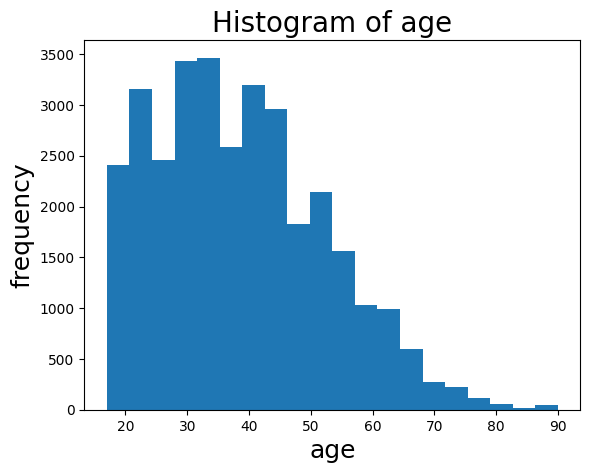

In [90]:
import matplotlib.pyplot as plt
plt.hist(Dataset["age"], bins=20)
plt.title("Histogram of age", fontsize=20)
plt.xlabel("age", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.show()

### 第二個欄位(workclass)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


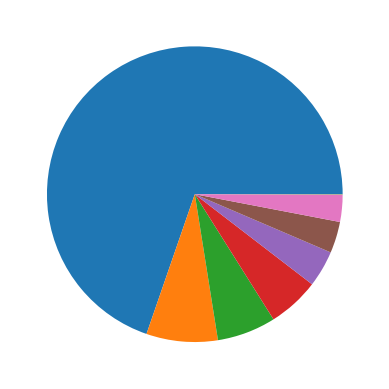

In [91]:
import matplotlib.pyplot as plt

print(Dataset["workclass"].value_counts())
plt.pie(Dataset["workclass"].value_counts())
plt.show()

### 第三個欄位(fnlwgt)

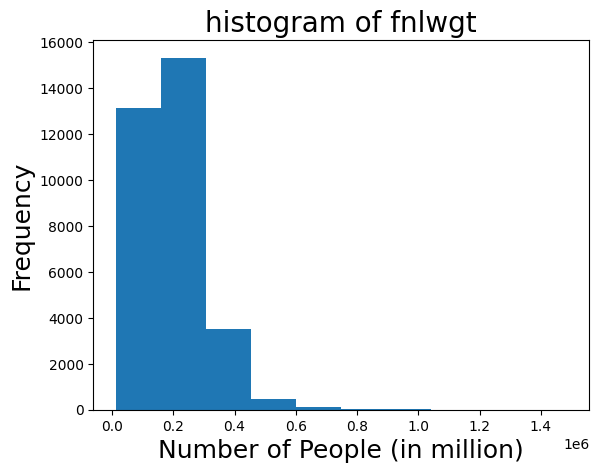

In [92]:
import matplotlib.pyplot as plt

plt.hist(Dataset["fnlwgt"])
plt.title("histogram of fnlwgt", fontsize=20)
plt.xlabel("Number of People (in million)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### 第四個欄位(education)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


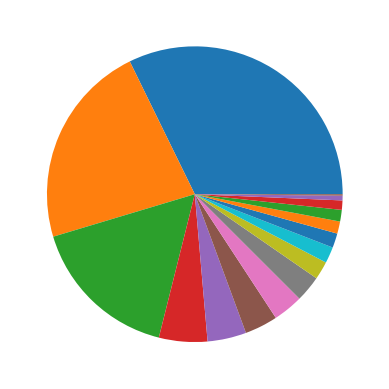

In [93]:
import matplotlib.pyplot as plt

print(Dataset["education"].value_counts())
plt.pie(Dataset["education"].value_counts())
plt.show()

### 第五個欄位(education-num)

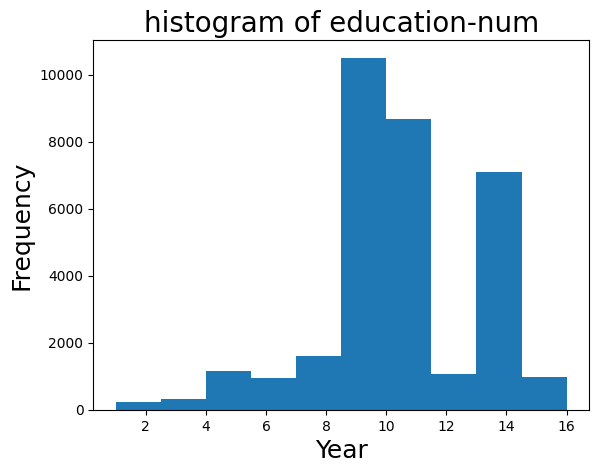

In [94]:
import matplotlib.pyplot as plt

plt.hist(Dataset["education-num"])
plt.title("histogram of education-num", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### 第六個欄位(marital-status)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


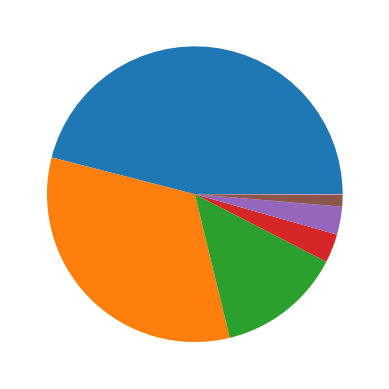

In [95]:
import matplotlib.pyplot as plt

print(Dataset["marital-status"].value_counts())
plt.pie(Dataset["marital-status"].value_counts())
plt.show()

### 第七個欄位(occupation)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


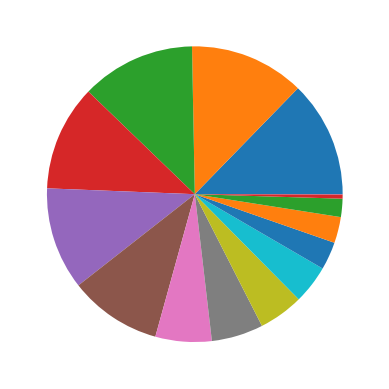

In [96]:
import matplotlib.pyplot as plt

print(Dataset["occupation"].value_counts())
plt.pie(Dataset["occupation"].value_counts())
plt.show()

### 第八個欄位(relationship)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


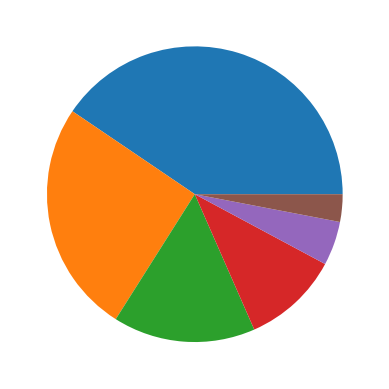

In [97]:
import matplotlib.pyplot as plt

print(Dataset["relationship"].value_counts())
plt.pie(Dataset["relationship"].value_counts())
plt.show()

### 第九個欄位(race)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


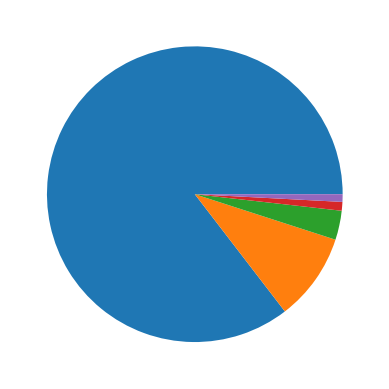

In [98]:
import matplotlib.pyplot as plt

print(Dataset["race"].value_counts())
plt.pie(Dataset["race"].value_counts())
plt.show()

### 第十個欄位(sex)

 Male      21790
 Female    10771
Name: sex, dtype: int64


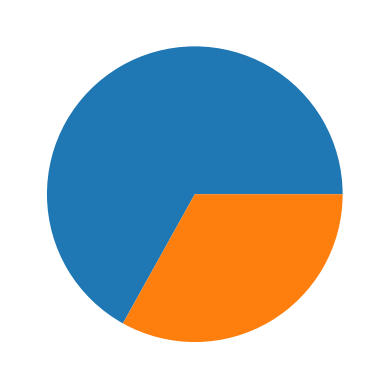

In [99]:
import matplotlib.pyplot as plt

print(Dataset["sex"].value_counts())
plt.pie(Dataset["sex"].value_counts())
plt.show()

### 第十一個欄位(capital-gain)

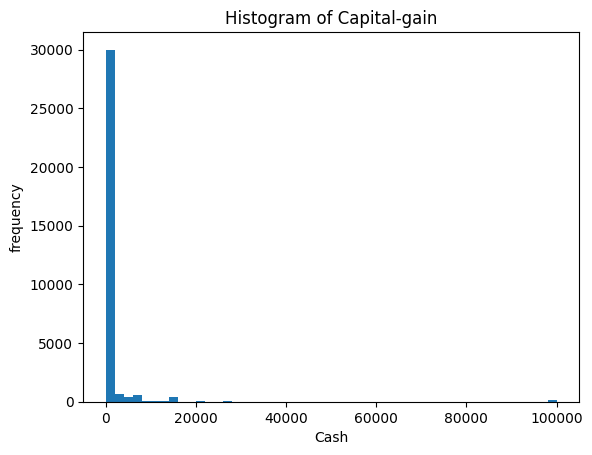

In [100]:
#(11/15) capital-gain
import matplotlib.pyplot as plt

plt.hist(Dataset["capital-gain"], bins=50)
plt.title("Histogram of Capital-gain")
plt.xlabel("Cash")
plt.ylabel("frequency")
plt.show()

### 第十二個欄位(capital-loss)

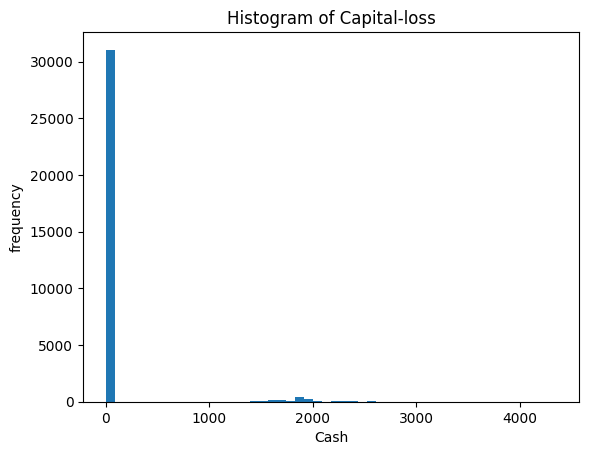

In [101]:
import matplotlib.pyplot as plt

plt.hist(Dataset["capital-loss"], bins=50)
plt.title("Histogram of Capital-loss")
plt.xlabel("Cash")
plt.ylabel("frequency")
plt.show()

### (Optional) 特徵加值: 嘗試由原始欄位生成新的欄位

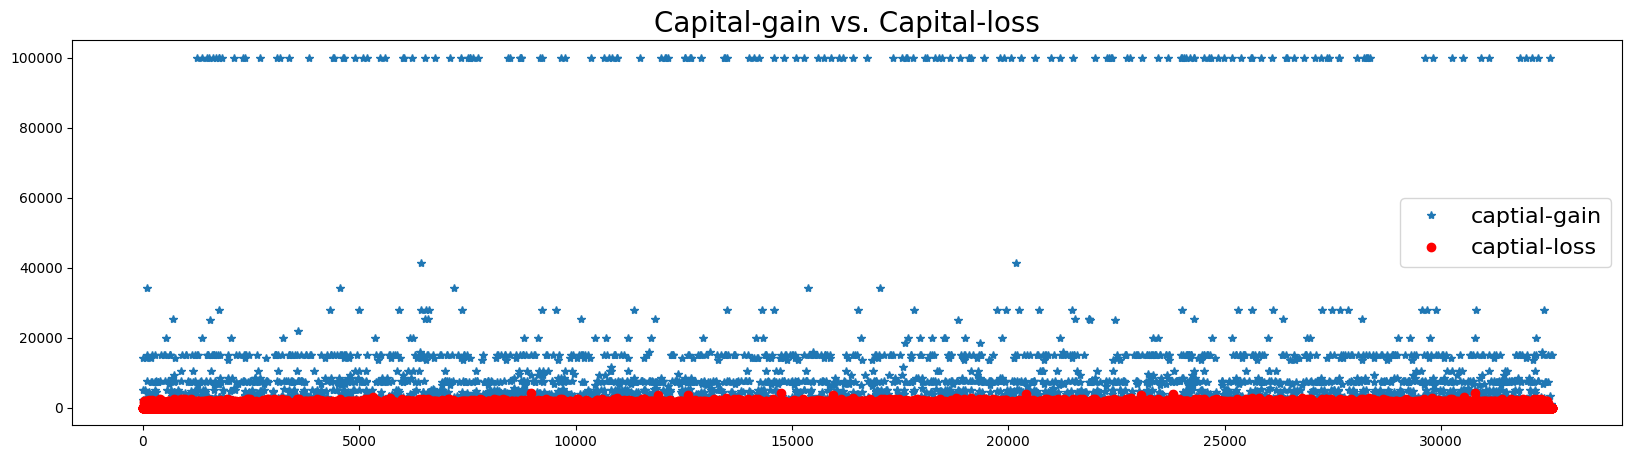

In [102]:
# 觀察 capital-gain 與 capital-loss
plt.figure(figsize=(20,5))
plt.plot(Dataset["capital-gain"], "*", label="captial-gain")
plt.plot(Dataset["capital-loss"], "o", label="captial-loss", c="red")
plt.title("Capital-gain vs. Capital-loss", fontsize=20)
plt.legend(fontsize=16)
plt.show()

In [103]:
# 把新的欄位命名為: capital-earn

# 方法一: 直接拿欄位進行相減
#Dataset["capital-earn"] = Dataset["capital-gain"] - Dataset["capital-loss"]

# 方法二: 使用 lambda 的方法
Dataset["capital-earn"] = Dataset.apply(lambda row: row['capital-gain'] - row["capital-loss"], axis=1)

In [38]:
Dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-earn
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


import numpy as np
from google.colab import autoviz
df_4948998905560745895 = autoviz.get_df('df_4948998905560745895')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4948998905560745895, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_277948676361127364 = autoviz.get_df('df_277948676361127364')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_277948676361127364, *['fnlwgt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8397112855461035875 = autoviz.get_df('df_8397112855461035875')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8397112855461035875, *['education-num'], **{})
chart

import numpy as np
from google.colab import autoviz
df_790052021963719675 = autoviz.get_df('df_790052021963719675')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_790052021963719675, *['capital-gain'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6003007333773478455 = autoviz.get_df('df_6003007333773478455')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6003007333773478455, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5187576658813102492 = autoviz.get_df('df_5187576658813102492')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5187576658813102492, *['fnlwgt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7077983712884688012 = autoviz.get_df('df_7077983712884688012')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7077983712884688012, *['education-num'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4349135742653392444 = autoviz.get_df('df_4349135742653392444')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4349135742653392444, *['capital-gain'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8865644992781273724 = autoviz.get_df('df_8865644992781273724')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8865644992781273724, *['workclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3599975719870389262 = autoviz.get_df('df_3599975719870389262')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3599975719870389262, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_865636612631886371 = autoviz.get_df('df_865636612631886371')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_865636612631886371, *['marital-status'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6968381658752691699 = autoviz.get_df('df_6968381658752691699')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6968381658752691699, *['occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1383077977690115197 = autoviz.get_df('df_1383077977690115197')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1383077977690115197, *[[['age', 'fnlwgt'], ['fnlwgt', 'education-num'], ['education-num', 'capital-gain'], ['capital-gain', 'hours-per-week']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5443909705599978250 = autoviz.get_df('df_5443909705599978250')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5443909705599978250, *['workclass', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6935748023033551382 = autoviz.get_df('df_6935748023033551382')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6935748023033551382, *['education', 'marital-status'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8915877798379149075 = autoviz.get_df('df_8915877798379149075')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8915877798379149075, *['marital-status', 'occupation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3772628672870952489 = autoviz.get_df('df_3772628672870952489')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3772628672870952489, *['occupation', 'relationship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7952497252160692920 = autoviz.get_df('df_7952497252160692920')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7952497252160692920, *['age', 'workclass'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8329888389146386144 = autoviz.get_df('df_8329888389146386144')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8329888389146386144, *['age', 'education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2662365106145631058 = autoviz.get_df('df_2662365106145631058')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2662365106145631058, *['age', 'marital-status'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2634014257115223599 = autoviz.get_df('df_2634014257115223599')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2634014257115223599, *['age', 'occupation'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2275587537690892110 = autoviz.get_df('df_2275587537690892110')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2275587537690892110, *['fnlwgt', 'age', 'workclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5011028195278066097 = autoviz.get_df('df_5011028195278066097')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5011028195278066097, *['fnlwgt', 'age', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_266675929132097606 = autoviz.get_df('df_266675929132097606')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_266675929132097606, *['fnlwgt', 'age', 'marital-status'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3311153988085302080 = autoviz.get_df('df_3311153988085302080')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3311153988085302080, *['fnlwgt', 'age', 'occupation'], **{})
chart

### 第十三個欄位(hours-per-week)

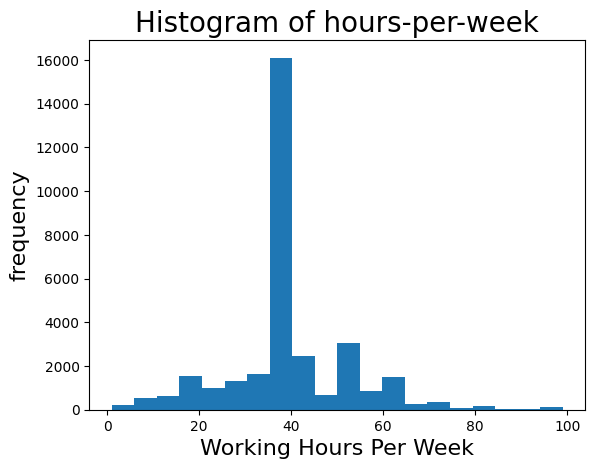

In [104]:
import matplotlib.pyplot as plt

plt.hist(Dataset["hours-per-week"], bins=20)
plt.title("Histogram of hours-per-week", fontsize=20)
plt.xlabel("Working Hours Per Week", fontsize=16)
plt.ylabel("frequency", fontsize=16)
plt.show()

### 第十四個欄位(native-country)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

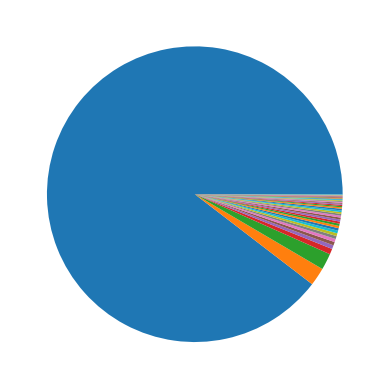

In [105]:
import matplotlib.pyplot as plt

print(Dataset["native-country"].value_counts())
plt.pie(Dataset["native-country"].value_counts())
plt.show()

### 第十五個欄位(income)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


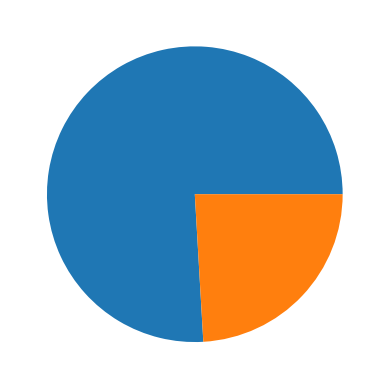

In [106]:
import matplotlib.pyplot as plt

print(Dataset["income"].value_counts())
plt.pie(Dataset["income"].value_counts())
plt.show()

In [107]:
# 把 字串型態的Answer (i.e. <=50K, >50K) 換成 1 與 0
print("[Before] ", Dataset["income"].value_counts())
Dataset["income"] = Dataset.apply(lambda row: 0 if row["income"]==" <=50K" else 1,axis=1)
print("\n[After] ", Dataset["income"].value_counts())

[Before]   <=50K    24720
 >50K      7841
Name: income, dtype: int64

[After]  0    24720
1     7841
Name: income, dtype: int64


## 步驟三: 辨識 數值型與類別型特徵

In [108]:
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:
  # print(Dataset[col].dtypes)
  attr_type = Dataset[col].dtypes
  if attr_type == "int64":
    numerical_attributes.append(col)
  elif attr_type == "object":
    categorical_attributes.append(col)

# 我們知道 income 是我們要分類的目標，它屬於 類別型 特徵
# 所以才有 remove 和 append 的操作
numerical_attributes.remove("income")
categorical_attributes.append("income")

print(f"數值型資料:{numerical_attributes}")
print(f"類別型資料:{categorical_attributes}")

數值型資料:['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital-earn']
類別型資料:['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


## 步驟四: 進行 One-Hot Encoding

In [109]:
# 使用 pandas 的 get_dummies，可以迅速的對 Dataset 中屬於類別型的欄位進行 One-Hot Encoding
import pandas as pd
print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")

One-Hot Encoding 前有 16 個欄位
One-Hot Encoding 後有 110 個欄位


In [ ]:
Dataset.head()

In [113]:
One_Hot_Dataset.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,capital-earn,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,2174,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 步驟五: 進行資料切分

In [114]:
Y = One_Hot_Dataset["income"]
X = One_Hot_Dataset.drop(["income"],axis=1)

In [117]:
# 使用 Scikit-Learn 套件的 train_test_split 協助我們切分訓練資料集和驗證資料集
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size=0.3)
print("訓練資料集有", len(X_train), "筆資料")
print("驗證資料集有", len(X_test), "筆資料")

# 訓練資料，是用來讓學習用的
# 驗證資料，不會參與訓練，將拿來評估最後模型表現的

訓練資料集有 22792 筆資料
驗證資料集有 9769 筆資料


## 步驟六: 進行 Feature Scaling

In [118]:
numerical_attributes

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'capital-earn']

In [119]:
from sklearn.preprocessing import StandardScaler

# 取出 Training Dataset 和 Testing Dataset 的數值型資料
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# 僅使用 training dataset 的資料去找到 mapping 的 rule ，大家知道為什麼嗎?
X_scaler = StandardScaler().fit(X_train_numerical)

# 使用 scaler 對 training 與 testing dataset 的數值型資料進行 transform
X_train_numerical_trans = X_scaler.transform(X_train_numerical)
X_test_numerical_trans = X_scaler.transform(X_test_numerical)

# 對數值型欄位的資料進行覆寫
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

## 步驟七: 訓練支援向量機(SVM)

In [121]:
# 使用支援向量機
from sklearn.svm import SVC
from time import time

SVM_Model = SVC(C=1.0 ,kernel='rbf', gamma=0.1)

tic = time()
SVM_Model.fit(X_train,Y_train)
toc = time()
print(f"SVM 訓練花費時間為 {round(toc-tic)} (sec)")

SVM 訓練花費時間為 28 (sec)


## 步驟八: 評估模型表現

In [123]:
from sklearn.metrics import accuracy_score

SVM_Prediction = SVM_Model.predict(X_test)
SVM_Accuracy = accuracy_score(Y_test,SVM_Prediction)
print("SVM之準確率為", round(SVM_Accuracy*100,2), "%")

SVM之準確率為 85.69 %


## 步驟九: 實驗不同的參數組合

In [128]:
def test_SVM_parameter(kernel, C, gamma):

  start = time()

  # 實例化演算法
  SVM_Model = SVC(C=C ,kernel=kernel, gamma=gamma)

  # 訓練模型
  SVM_Model.fit(X_train, Y_train)

  # 評估模型
  # 使用訓練的支援向量機進行分類 (on validation dataset)
  SVM_Predictions = SVM_Model.predict(X_test)
  SVM_Accuracy = accuracy_score(Y_test,SVM_Prediction)

  end = time()

  print(f"\n[C={C}, Gamma={gamma}]準確率（Accuracy）是 {round(SVM_Accuracy*100,2)} %，共花費{round(end-start)}(sec)")

In [ ]:
from sklearn.metrics import accuracy_score
from time import time

kernel = "rbf"

# 將會實驗 9 種可能的超參數組合
C_list = [0.1, 1, 10]
Gamma_list = [0.1, 1, 10]

# 將會實驗 25 種可能的超參數組合
# C_list = [0.01, 0.1, 1, 10, 100]
# Gamma_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  for gamma in Gamma_list:
    test_SVM_parameter(kernel=kernel, C=C, gamma=gamma)